In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import shap
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data = pd.read_csv("data/vietnam_data - round_1+5_clean-2.csv")

In [3]:
df = pd.DataFrame(data)

In [6]:
df.head(5)
# df.info()
# df.describe()

,agemon1,aniany1,bcg1,mbi1,careage1,carecantread1,caredu1,caregiver_is_female1,caregiver_is_parent1,chldrel1,...,bmi5,stunting5,thinness5,chhealth5,z_selfefficacy_r5,z_agency_r5,z_selfsteem_r5,z_peersr5,z_pride_r5,z_relationparents_r5
0,7,1,1,1.492,30,0,12,1,1,2,...,14.497,1,2,2,-9.028,4.059,-59.378,-19.711,10.155,-11.409
1,14,1,1,15.547,25,0,13,1,1,2,...,1.996,0,0,2,-66.635,-23.302,6.132,43.033,-17.874,-16.163
2,11,1,1,15.734,30,0,9,1,1,2,...,17.469,0,0,2,8.629,1.068,-1.341,7.135,2.924,-15.511
3,12,1,1,15.627,36,0,6,1,1,2,...,19.086,1,0,2,-12.449,10.170,-92.681,-69.922,-10.341,14.757
4,16,1,1,15.591,28,0,6,1,1,1,...,21.771,0,0,2,38.351,4.059,29.960,-19.711,-40.752,42.165


In [ ]:
#Convert type

In [5]:
df['z_selfefficacy_r5'] = df['z_selfefficacy_r5'].apply(
    lambda x: float(x.split('.')[0] + '.' + x.split('.')[1]) if isinstance(x, str) else x
)
df['z_agency_r5'] = df['z_agency_r5'].apply(
    lambda x: float(x.split('.')[0] + '.' + x.split('.')[1]) if isinstance(x, str) else x
)
df['z_selfsteem_r5'] = df['z_selfsteem_r5'].apply(
    lambda x: float(x.split('.')[0] + '.' + x.split('.')[1]) if isinstance(x, str) else x
)
df['z_peersr5'] = df['z_peersr5'].apply(
    lambda x: float(x.split('.')[0] + '.' + x.split('.')[1]) if isinstance(x, str) else x
)
df['z_pride_r5'] = df['z_pride_r5'].apply(
    lambda x: float(x.split('.')[0] + '.' + x.split('.')[1]) if isinstance(x, str) else x
)
df['z_relationparents_r5'] = df['z_relationparents_r5'].apply(
    lambda x: float(x.split('.')[0] + '.' + x.split('.')[1]) if isinstance(x, str) else x
)


# Check missing value


In [7]:
# Dependent variables (Round 1)
X = df.iloc[:, :-10]

# Dependent variables (Round 5)
y = df.iloc[:, -10:]


print(X.columns.tolist())
print("------------")
print(y.columns.tolist())

['agemon1', 'aniany1', 'bcg1', 'mbi1', 'careage1', 'carecantread1', 'caredu1', 'caregiver_is_female1', 'caregiver_is_parent1', 'chldrel1', 'cookingq1', 'dadage1', 'dadedu1', 'dadlive1', 'drwaterq1', 'elecq1', 'female1', 'headage1', 'headedu1', 'headrel1', 'headsex1', 'hhsize1', 'measles1', 'momage1', 'momedu1', 'momlive1', 'numante1', 'ownlandhse1', 'stuning1', 'sv1', 'tetanus1', 'toiletq1', 'typesite1', 'underweight1', 'CLUSTID_r1', 'injury_child_may_die_r1', 'has_longterm_disease_r1', 'sees_dad_daily_r1', 'sees_mom_daily_r1', 'health_worse_than_others_r1']
------------
['bmi5', 'stunting5', 'thinness5', 'chhealth5', 'z_selfefficacy_r5', 'z_agency_r5', 'z_selfsteem_r5', 'z_peersr5', 'z_pride_r5', 'z_relationparents_r5']


In [94]:
# missing_counts = df.isnull().sum()
# print(missing_counts)

In [8]:
# Scale the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for clarity (optional)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


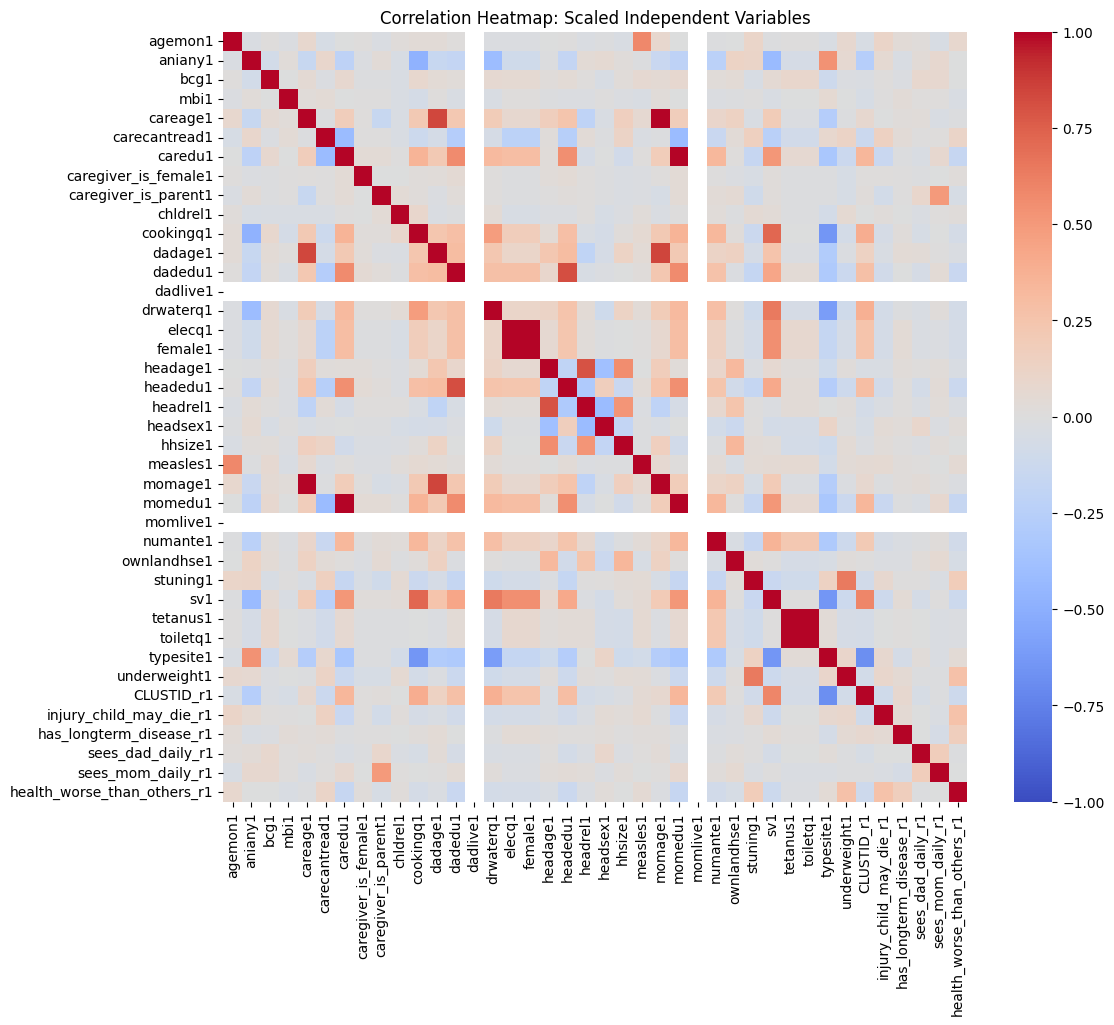

In [9]:
corr_X = X_scaled.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_X, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap: Scaled Independent Variables')
plt.show()

In [10]:
# retain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Check number of components
print("Number of PCA components:", pca.n_components_)
print("Explained variance ratio:", sum(pca.explained_variance_ratio_))

Number of PCA components: 26
Explained variance ratio: 0.9513491875514107


95.13% of the variance in the original dataset is preserved by the 26 principal components.


## Split Data into Train, Validation, and Test Sets

In [12]:
# Split into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train shapes:", X_train.shape, y_train.shape)
print("Validation shapes:", X_val.shape, y_val.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (862, 26) (862, 10)
Validation shapes: (185, 26) (185, 10)
Test shapes: (185, 26) (185, 10)


# Feedforward Neural Network (FNN)

In [24]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_pca.shape[1],)),
    Dense(32, activation='relu'),
    Dense(10)  # 10 outputs
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7693.0093 - mae: 25.8952 - val_loss: 7054.7036 - val_mae: 25.8493
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8372.4844 - mae: 26.7286 - val_loss: 7045.6831 - val_mae: 25.7751
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7887.0088 - mae: 26.2767 - val_loss: 7030.7461 - val_mae: 25.6668
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7199.4331 - mae: 24.6465 - val_loss: 7009.2583 - val_mae: 25.5713
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7188.4385 - mae: 25.1596 - val_loss: 6979.4702 - val_mae: 25.5073
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8157.8682 - mae: 26.2315 - val_loss: 6946.1372 - val_mae: 25.4988
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7816.1641 - mae: 25.7922 - val_loss: 6916.3208 - val_mae: 25.5883
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7798.5044 - mae: 25.8017 - val_loss: 6895.4678 - val_mae: 25.8328
Epoch 9/50
27/27 ━━

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,416 (48.50 KB)

 Trainable params: 4,138 (16.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,278 (32.34 KB)

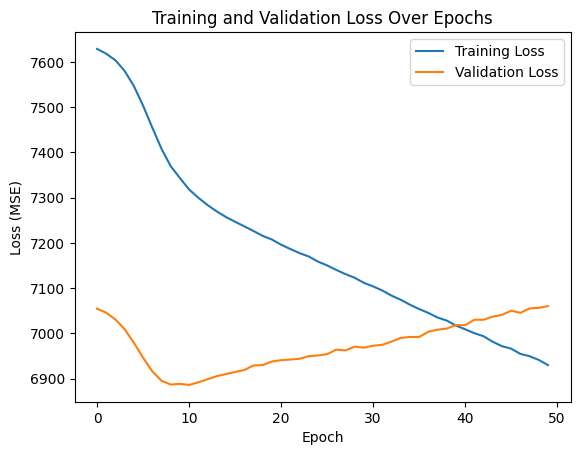

In [32]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

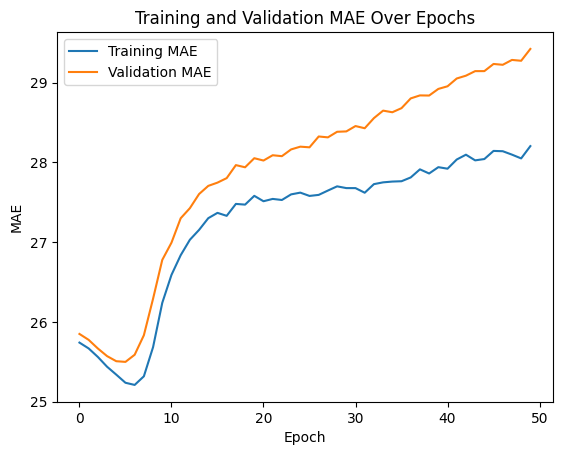

In [33]:
# Plot training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE Over Epochs')
plt.legend()
plt.show()

In [36]:
# Updated model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_pca.shape[1],)),
    Dropout(0.2),  # 20% of neurons dropped
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(10)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

# Re-evaluate
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Updated Test Loss (MSE): {test_loss:.4f}")
print(f"Updated Test MAE: {test_mae:.4f}")

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7552.0566 - mae: 26.0230 - val_loss: 7042.5244 - val_mae: 25.8558
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6791.9834 - mae: 24.6785 - val_loss: 7029.1045 - val_mae: 25.7308
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6907.9072 - mae: 24.9410 - val_loss: 7012.7886 - val_mae: 25.6033
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8017.6230 - mae: 26.1112 - val_loss: 6991.8555 - val_mae: 25.4487
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8332.7314 - mae: 26.5359 - val_loss: 6969.6411 - val_mae: 25.3585
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8029.4399 - mae: 25.7524 - val_loss: 6946.0688 - val_mae: 25.3261
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8531.3799 - mae: 26.5012 - val_loss: 6926.1973 - val_mae: 25.3517
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7442.0171 - mae: 25.2547 - val_loss: 6907.2095 - val_mae: 25.5320
